# Forest Fires in Brazil Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding='Latin-1')

In [5]:
df['year'] = df['year'].astype(int)

In [6]:
months = {'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April', 'Maio':'May', 
          'Junho':'June', 'Julho':'July', 'Agosto':'August', 'Setembro':'September', 'Outubro':'October',
         'Novembro':'November', 'Dezembro':'December'}
df['month'] = df['month'].map(months)
print(df['month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [7]:
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [8]:
df['state'] = df['state'].str.replace('á', 'a')
df['state'] = df['state'].str.replace('Piau', 'Piaui')

Removed accent marks and corrected the name for Piaui.

# Yearly Analysis

Panggilan dari setiap tahun

In [10]:
df_year = df[['year', 'number']]

In [11]:
df_year = df_year.groupby('year').sum()

In [12]:
df_year.head()

,number
year,
1998,20013.971
1999,26882.821
2000,27351.251
2001,29071.612
2002,37390.600


df_year contains the sum of all fires by year

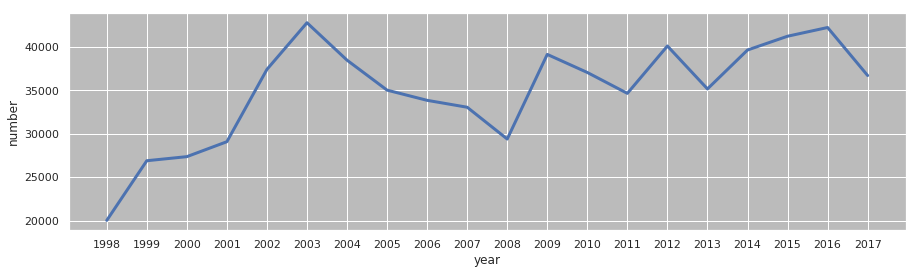

In [13]:
import matplotlib.ticker as ticker
sns.set(rc = {'axes.facecolor':'#bbbbbb'})
plt.figure(figsize=(15,4))
sns.set_context(rc = {'lines.linewidth':3})
g = sns.lineplot(x=df_year.index, y='number', data=df_year)
g.xaxis.set_major_locator(ticker.MultipleLocator(1))

Banyaknya laporan kebakaran hutan di Amazon

In [14]:
df_amazonas = df.loc[df['state']=='Amazonas']

In [15]:
df_amazonas = df_amazonas[['year', 'number']].groupby('year', as_index=False).sum()

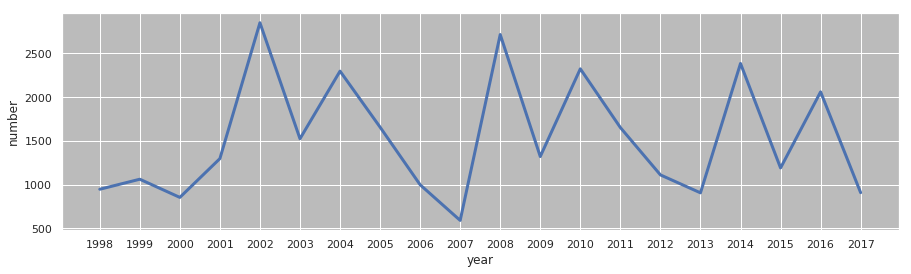

In [16]:
sns.set(rc = {'axes.facecolor':'#bbbbbb'})
plt.figure(figsize=(15,4))
sns.set_context(rc = {'lines.linewidth':3})
g = sns.lineplot(x='year', y='number', data=df_amazonas)
g.xaxis.set_major_locator(ticker.MultipleLocator(1))

# State Analysis

Analisis pada setiap bagian State

In [22]:
df_st = df[['state', 'number']]
df_st = df_st.groupby('state', as_index=False).sum()
df_st_sorted = pd.DataFrame()
df_st_sorted['number'] = df_st['number'].sort_values(ascending=False)
df_st_sorted['state'] = df_st['state']
df_st_sorted = df_st_sorted.dropna()

df_st_sorted contains the sum of fires per state in descending order

Text(-15.665000000000006, 0.5, 'Number of Fires')

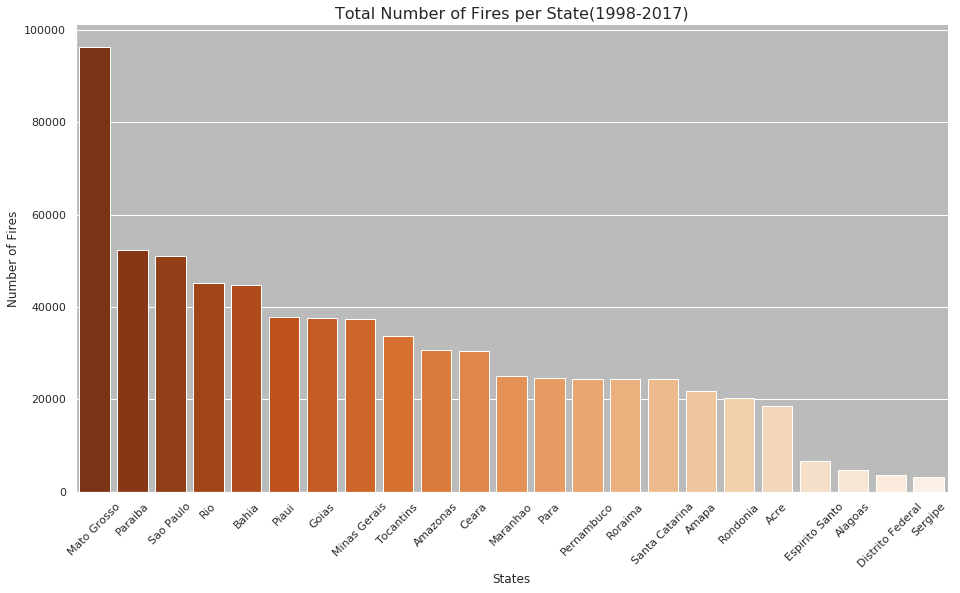

In [23]:
sns.set(rc = {'axes.facecolor':'#bbbbbb'})
g = sns.catplot(x='state', y='number', data=df_st_sorted, kind='bar', ci=None, palette='Oranges_r')
g.fig.set_figwidth(18)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=45)
plt.title('Total Number of Fires per State(1998-2017)', size=16)
plt.xlabel('States')
plt.ylabel('Number of Fires')

In [24]:
state_area = pd.Series(index = ['Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia', 'Piaui', 'Goias', 
                                'Minas Gerais', 'Tocantins', 'Amazonas', 'Ceara', 'Maranhao', 'Para',
                               'Pernambuco', 'Roraima', 'Santa Catarina', 'Amapa', 'Rondonia', 'Acre', 
                                'Espirito Santo', 'Alagoas', 'Distrito Federal', 'Sergipe'],
                      data = [903366.192, 56585, 248222.362, 43780.172, 564733.177, 251577.738, 340111.783,
                            586522.122, 277720.520, 1559159.148, 148920.472, 331937.450, 1247954.666,
                            98311.616, 224300.506, 95736.165, 142828.521, 237590.547, 164123.040,
                            46095.583, 27778.506, 5779.999, 21915.116])
                

Creating a fires per km squared column.

# Monthly Analysis

Kebakaran Perbulan

In [29]:
df_month = df[['month', 'number']].groupby('month', as_index=False).sum()

In [30]:
months = pd.Series(df['month'].unique())
df_month_org = pd.DataFrame()
df_month_org['month'] = months
df_month_org['number'] = df_month['number']

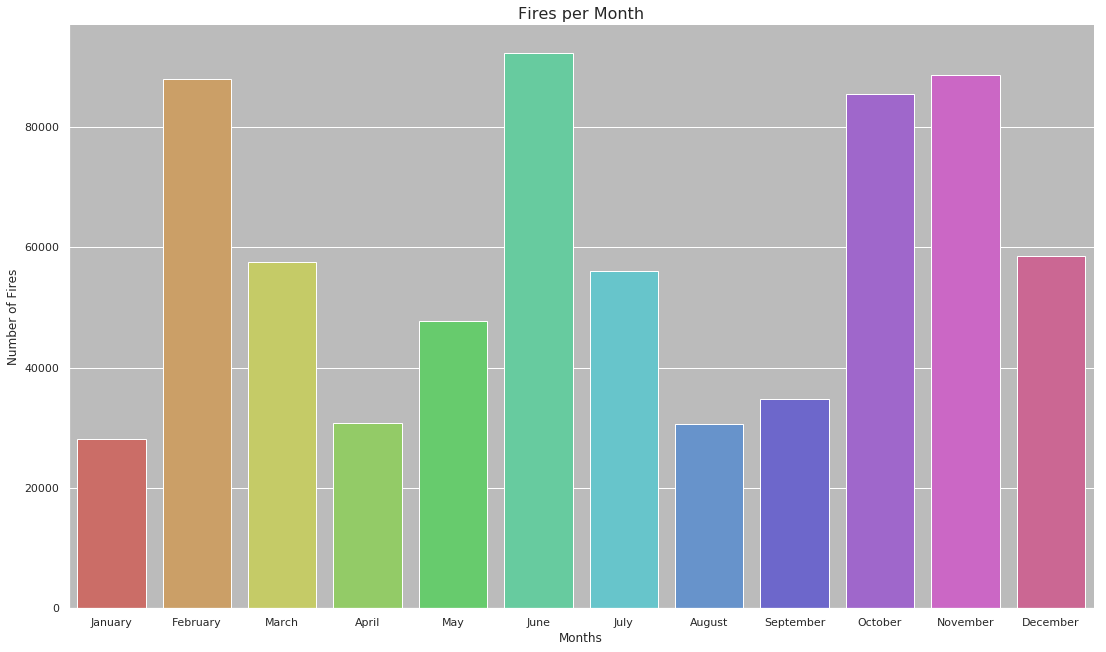

In [31]:
sns.set(rc = {'axes.facecolor':'#bbbbbb'})
g = sns.catplot(x = 'month', y = 'number', data = df_month_org, kind = 'bar', ci = None, palette='hls')
plt.title('Fires per Month', size=16)
plt.ylabel('Number of Fires', size=12)
plt.xlabel('Months', size=12)
g.fig.set_figheight(10)
g.fig.set_figwidth(20)